In [1]:
from evaluation import Evaluator
from pprint import pprint

import sys
sys.path.append("../dataset")
sys.path.append("../models")
from data_loader import DataLoader, playtime_forever_edge_scoring_function, LinearNormalizer, GaussianNormalizer, PercentileNormalizer
from random_model import RandomModel
from common_neighbors_model import CommonNeighborsModel
from popularity_model import GamePopularityModel
from collaborative_filtering_model import CollaborativeFiltering
from ncf_model import NCFModel

In [2]:
evaluator = Evaluator(top_N_games_to_eval = 500)

# data_loader = DataLoader()
data_loader = DataLoader(edge_scoring_function = playtime_forever_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], score_normalizers = [GaussianNormalizer(1.0, 1.0)])
# data_loader = DataLoader(edge_scoring_function = playtime_forever_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], score_normalizers = [GaussianNormalizer(1.0, 1.0)], game_embeddings = ['name', 'numReviews', 'avgReviewScore', 'price', 'genres', 'tags'])
# data_loader = DataLoader(edge_scoring_function = playtime_forever_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], score_normalizers = [GaussianNormalizer(1.0, 1.0)], game_embeddings = ['name', 'genres'])
network = data_loader.get_full_network()
data_loader.load_stratified_user_train_test_network(network=network, train_percentage=0.8, test_percentage=0.2, seed=0)

In [3]:
# This is just a buffer cell

random


User Predictions: 100%|██████████| 5000/5000 [00:51<00:00, 98.01it/s] 


Done getting predictions.
Done getting edge results.
random
{'auc_roc': 0.4908035933078027,
 'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'mean_positional_error': 1.7946016210587437,
 'roc_figure': <Figure size 640x480 with 1 Axes>,
 'top_10_hit_percentage': 0.0006198907442563249,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_based_auc_roc': 0.5088976340854102,
 'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}



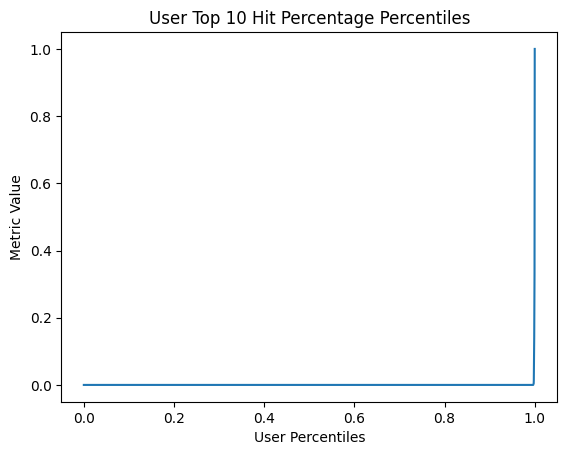

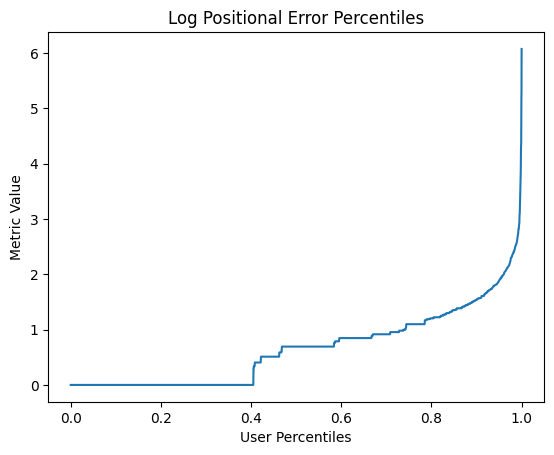

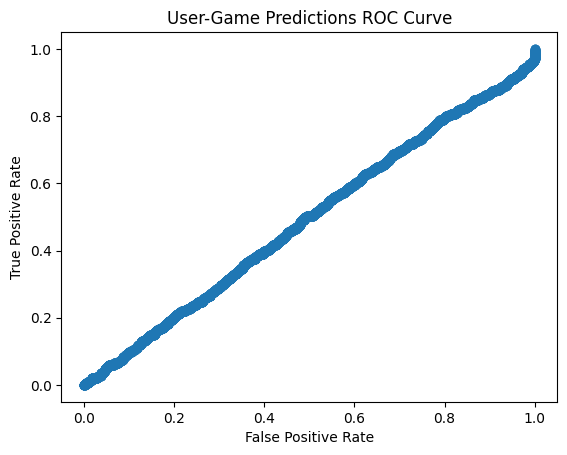

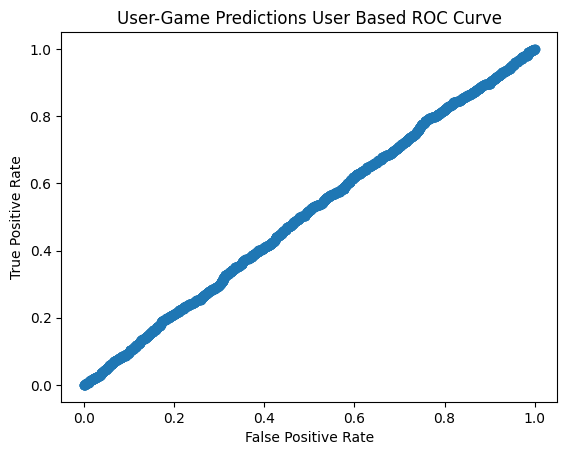

In [4]:
random_model = RandomModel(seed = 0)
random_model.set_data_loader(data_loader)
random_model.train()

evaluator.reset(random_model, debug=True)
evaluator.plot_top_N_hit_percentage_percentiles(10)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_hit_percentage(10)
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(random_model.name())
pprint(evaluator.metrics)
print()

In [5]:
# random
# {'auc_roc': 0.4908035933078027,
#  'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'mean_positional_error': 1.7946016210587437,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'top_10_hit_percentage': 0.0006198907442563249,
#  'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'user_based_auc_roc': 0.5088976340854102,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

game_popularity


User Predictions: 100%|██████████| 5000/5000 [00:16<00:00, 295.11it/s]


Done getting predictions.
Done getting edge results.
game_popularity
{'auc_roc': 0.7633572629261289,
 'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'mean_positional_error': 1.658544742864416,
 'roc_figure': <Figure size 640x480 with 1 Axes>,
 'top_10_hit_percentage': 0.17560446373217606,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_based_auc_roc': 0.7859039715247095,
 'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}



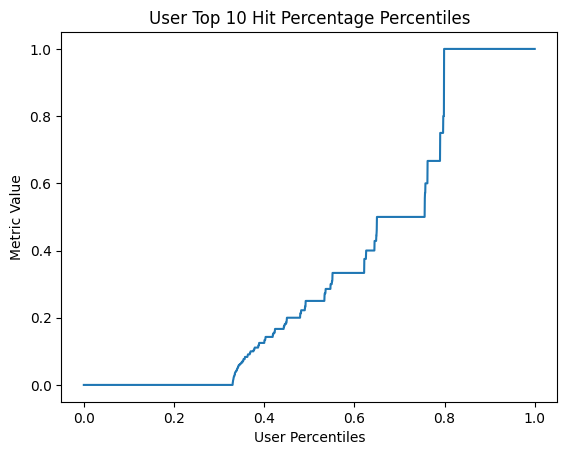

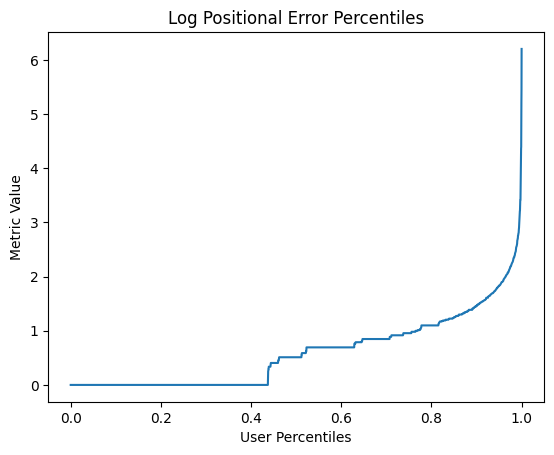

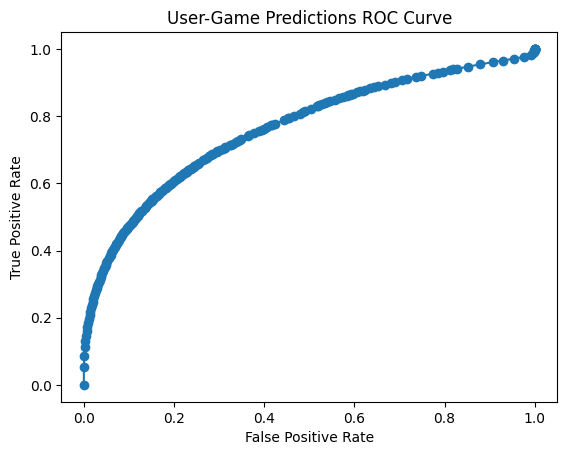

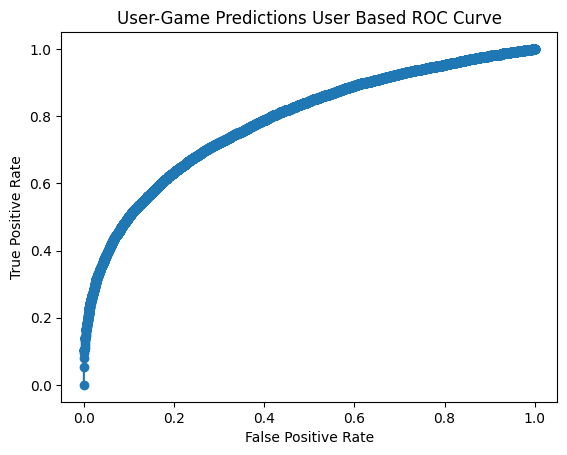

In [6]:
popularity_model = GamePopularityModel()
popularity_model.set_data_loader(data_loader)
popularity_model.train()

evaluator.reset(popularity_model, debug=True)
evaluator.plot_top_N_hit_percentage_percentiles(10)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_hit_percentage(10)
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(popularity_model.name())
pprint(evaluator.metrics)
print()

common_neighbors


User Predictions: 100%|██████████| 5000/5000 [00:50<00:00, 99.17it/s] 


Done getting predictions.
Done getting edge results.
common_neighbors
{'auc_roc': 0.8899137027263045,
 'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'mean_positional_error': 1.6658381240267393,
 'roc_figure': <Figure size 640x480 with 1 Axes>,
 'top_10_hit_percentage': 0.18550936993907613,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_based_auc_roc': 0.7994016627870091,
 'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}



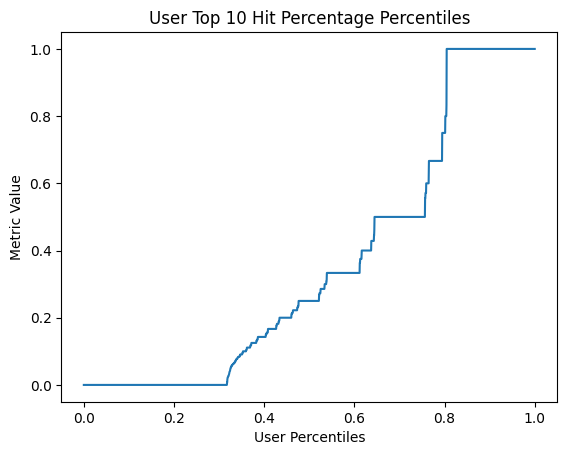

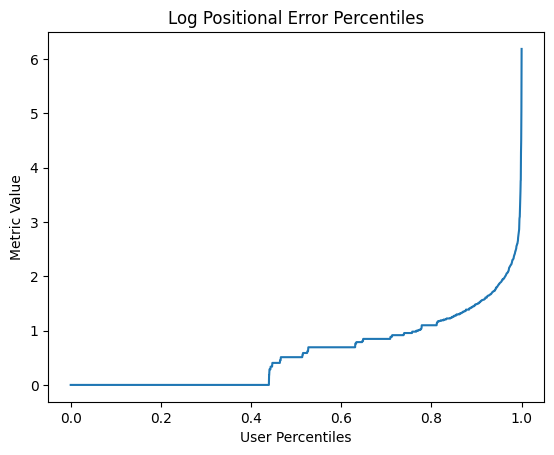

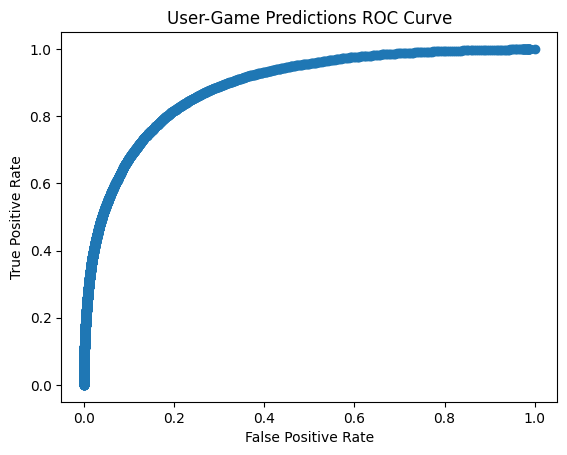

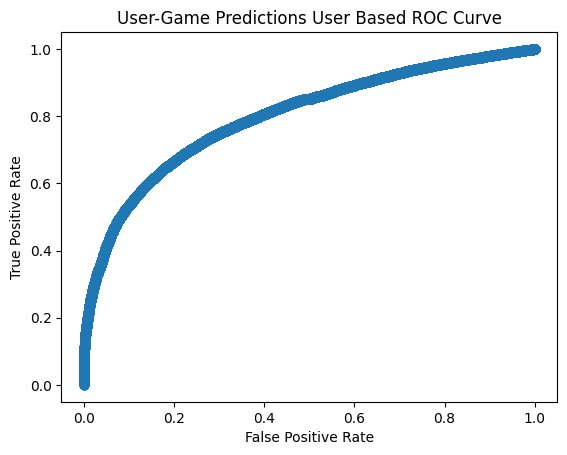

In [7]:
common_neighbors_model = CommonNeighborsModel()
common_neighbors_model.set_data_loader(data_loader)
common_neighbors_model.train()

evaluator.reset(common_neighbors_model, debug=True)
evaluator.plot_top_N_hit_percentage_percentiles(10)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_hit_percentage(10)
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(common_neighbors_model.name())
pprint(evaluator.metrics)
print()

Total Learnable Parameters: 9706500
Known Game Embeddings:  []
Known User Embeddings:  []


100%|██████████| 75/75 [06:01<00:00,  4.83s/it]


collaborative_filtering


User Predictions: 100%|██████████| 5000/5000 [00:41<00:00, 121.74it/s]


Done getting predictions.
Done getting edge results.
collaborative_filtering
{'auc_roc': 0.737362100981729,
 'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'mean_positional_error': 1.3587312208098294,
 'roc_figure': <Figure size 640x480 with 1 Axes>,
 'score_absolute_error_mean': 0.41156607524733585,
 'score_absolute_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'top_10_hit_percentage': 0.05422363375808513,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_based_auc_roc': 0.6239167234918137,
 'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}



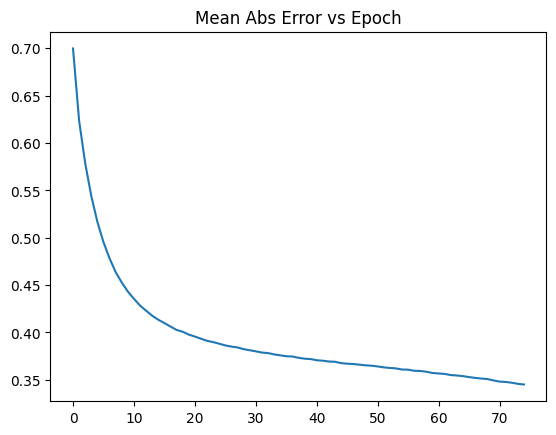

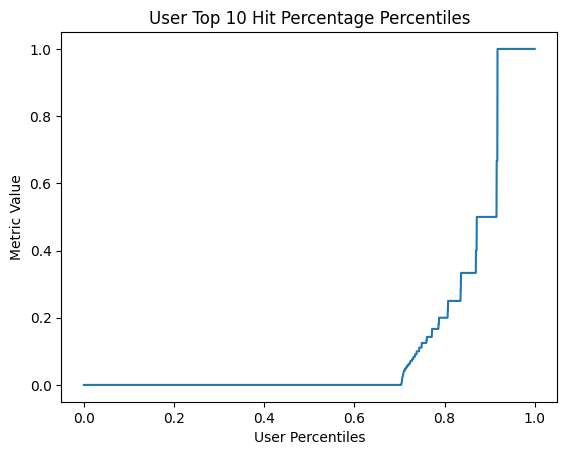

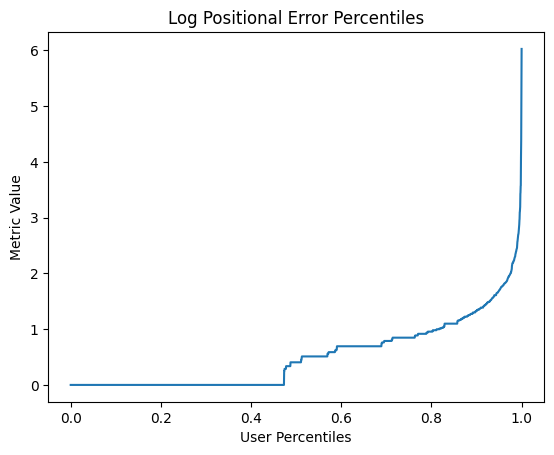

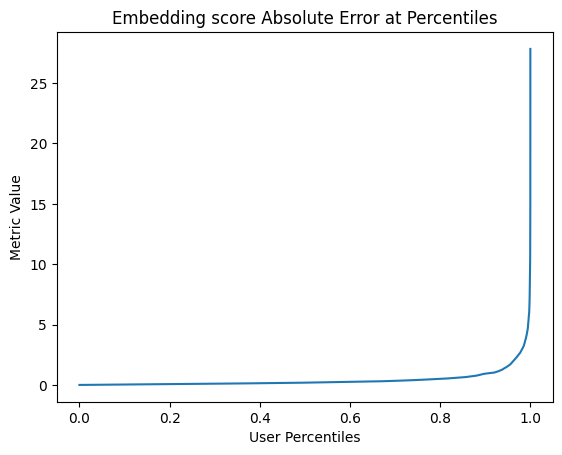

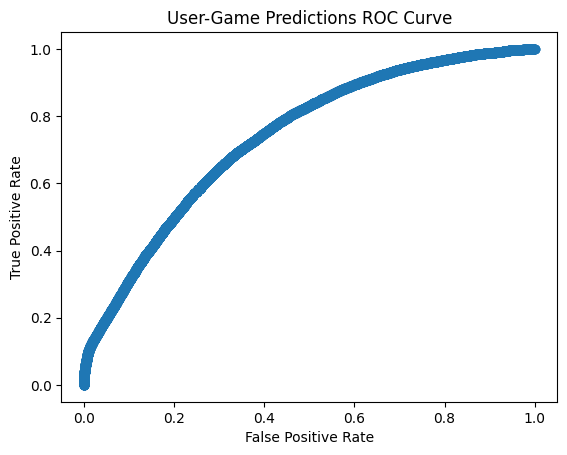

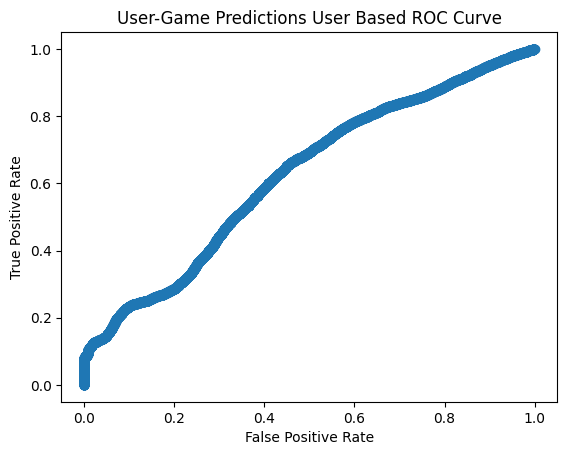

In [8]:
collaborative_filtering_model = CollaborativeFiltering(num_epochs = 75, num_user_embedding = 500, num_game_embedding = 500, learning_rate = 1.0, regularization = 0.05, seed = 0)
collaborative_filtering_model.set_data_loader(data_loader)
collaborative_filtering_model.train(debug=True)

evaluator.reset(collaborative_filtering_model, debug=True)
evaluator.plot_top_N_hit_percentage_percentiles(10)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_hit_percentage(10)
evaluator.compute_embedding_mean_absolute_error('score')
evaluator.plot_embedding_percentile_absolute_error('score')
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(collaborative_filtering_model.name())
pprint(evaluator.metrics)
print()

Known Game Embeddings:  []
Known User Embeddings:  []
Total Learnable Parameters: 20090365


Training: 100%|██████████| 40/40 [00:39<00:00,  1.02it/s]


neural_collborative_filtering_ncf


User Predictions: 100%|██████████| 5000/5000 [05:04<00:00, 16.42it/s]


Done getting predictions.
Done getting edge results.
neural_collborative_filtering_ncf
{'auc_roc': 0.7890513814935791,
 'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'mean_positional_error': 1.5302267572954247,
 'roc_figure': <Figure size 640x480 with 1 Axes>,
 'score_absolute_error_mean': 0.4568633075469575,
 'score_absolute_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'top_10_hit_percentage': 0.03885940103056836,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_based_auc_roc': 0.7454750818802636,
 'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}



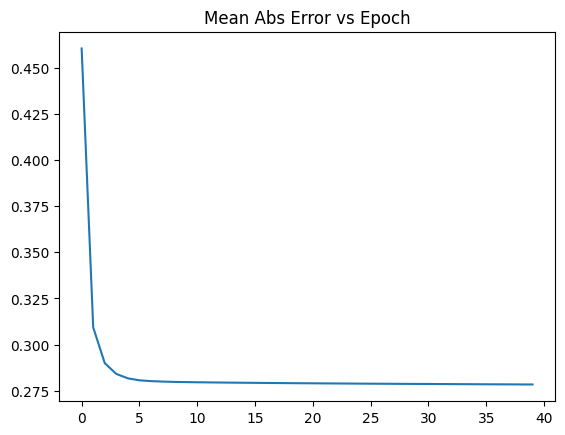

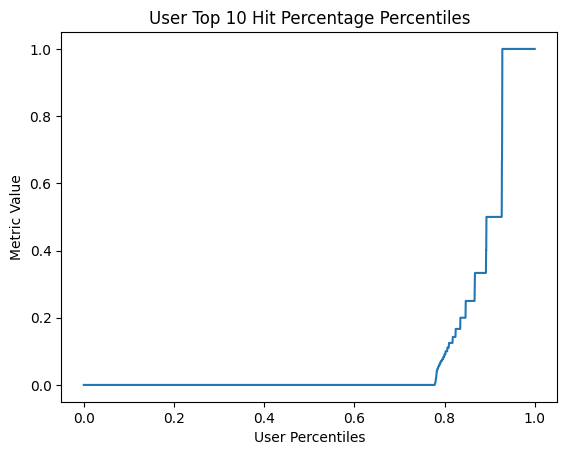

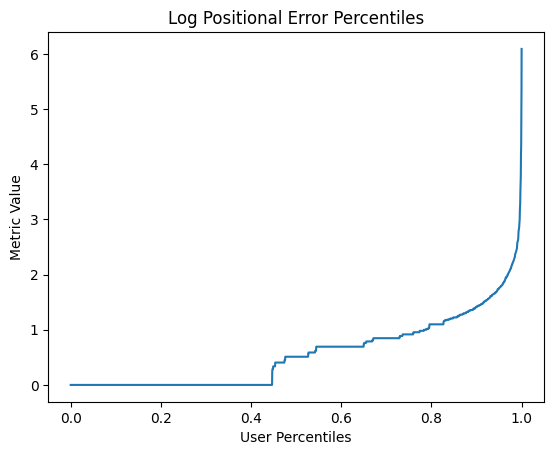

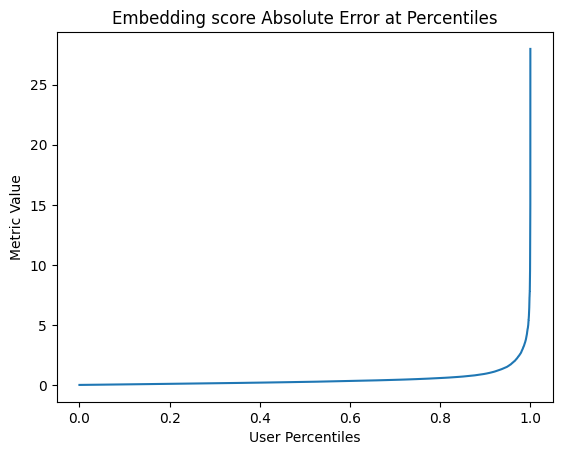

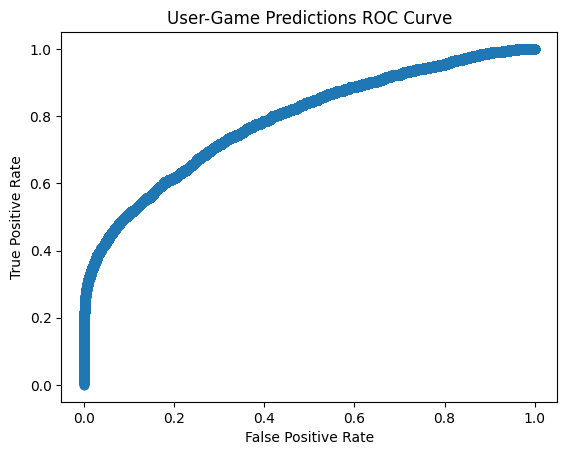

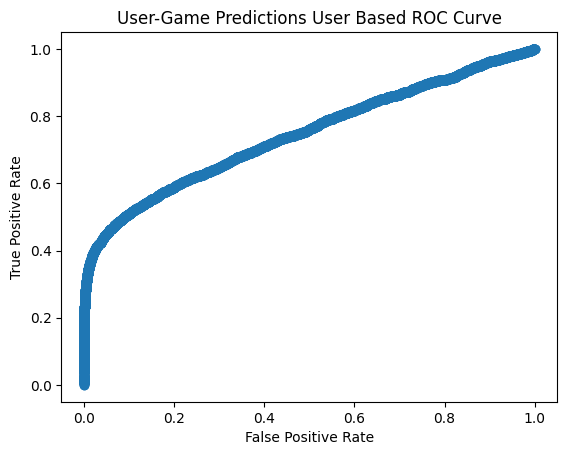

In [3]:
ncf_model = NCFModel(num_epochs = 40, embedding_size = 500, batch_percent = 0.1, learning_rate = 1e-3, mlp_hidden_layer_sizes = [512, 256, 128], seed=0, model_type='ncf')
ncf_model.set_data_loader(data_loader)
ncf_model.train(debug=True)

evaluator.reset(ncf_model, debug=True)
evaluator.plot_top_N_hit_percentage_percentiles(10)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_hit_percentage(10)
evaluator.compute_embedding_mean_absolute_error('score')
evaluator.plot_embedding_percentile_absolute_error('score')
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(ncf_model.name())
pprint(evaluator.metrics)
print()

Known Game Embeddings:  []
Known User Embeddings:  []
Total Learnable Parameters: 9707001


Training: 100%|██████████| 40/40 [00:13<00:00,  2.97it/s]


neural_collborative_filtering_gcf


User Predictions: 100%|██████████| 5000/5000 [02:18<00:00, 35.99it/s]


Done getting predictions.
Done getting edge results.
neural_collborative_filtering_gcf
{'auc_roc': 0.37270946487065754,
 'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'mean_positional_error': 1.8210273399270256,
 'roc_figure': <Figure size 640x480 with 1 Axes>,
 'score_absolute_error_mean': 8.841391562778629,
 'score_absolute_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'top_10_hit_percentage': 0.00027121270825261525,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_based_auc_roc': 0.4787304584341596,
 'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}



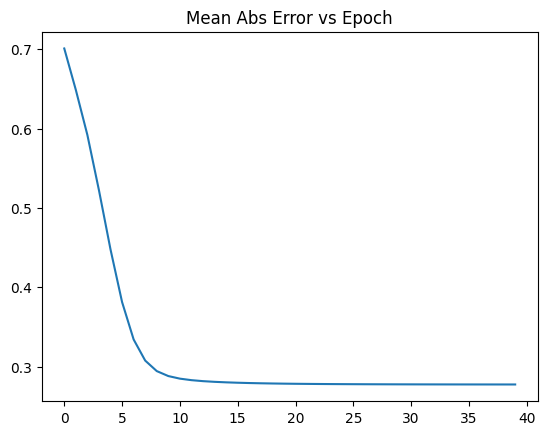

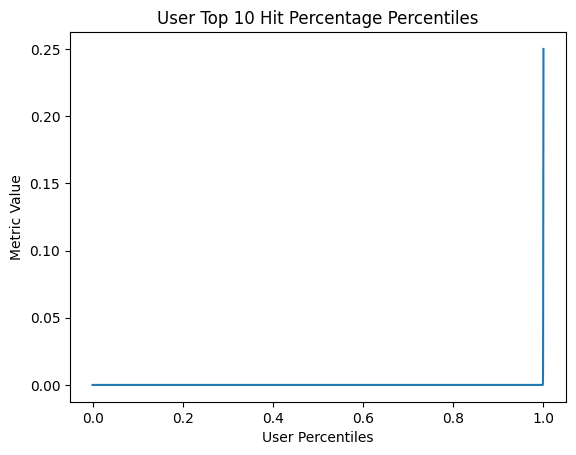

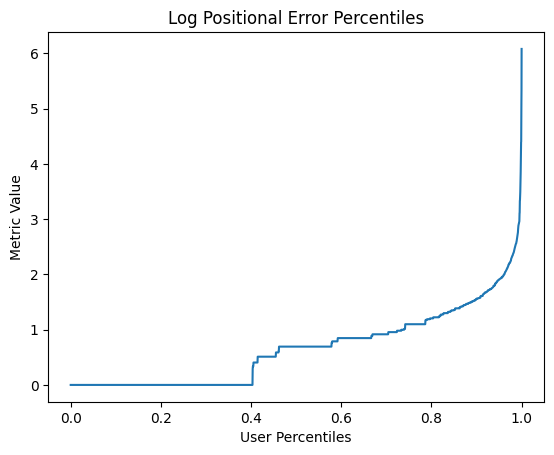

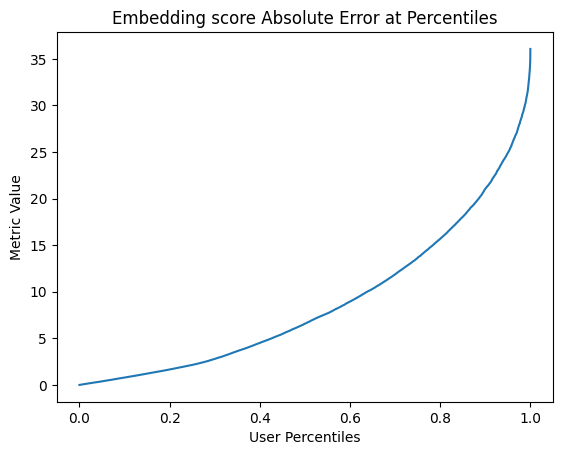

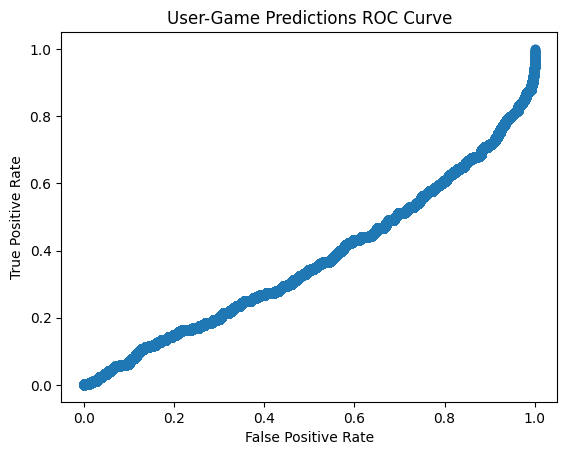

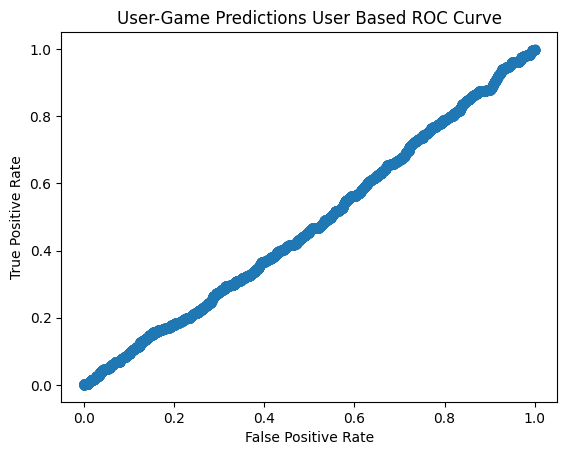

In [4]:
gcf_model = NCFModel(num_epochs = 40, embedding_size = 500, batch_percent = 0.1, learning_rate = 1e-2, mlp_hidden_layer_sizes = [], seed=0, model_type='gcf')
gcf_model.set_data_loader(data_loader)
gcf_model.train(debug=True)

evaluator.reset(gcf_model, debug=True)
evaluator.plot_top_N_hit_percentage_percentiles(10)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_hit_percentage(10)
evaluator.compute_embedding_mean_absolute_error('score')
evaluator.plot_embedding_percentile_absolute_error('score')
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(gcf_model.name())
pprint(evaluator.metrics)
print()

In [5]:
mlp_model = NCFModel(num_epochs = 40, embedding_size = 500, batch_percent = 0.1, learning_rate = 1e-3, mlp_hidden_layer_sizes = [512, 256, 128], seed=0, model_type='mlp')
mlp_model.set_data_loader(data_loader)
mlp_model.train(debug=True)

evaluator.reset(mlp_model, debug=True)
evaluator.plot_top_N_hit_percentage_percentiles(10)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_hit_percentage(10)
evaluator.compute_embedding_mean_absolute_error('score')
evaluator.plot_embedding_percentile_absolute_error('score')
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(mlp_model.name())
pprint(evaluator.metrics)
print()

Known Game Embeddings:  []
Known User Embeddings:  []
Total Learnable Parameters: 10383365


Training:  40%|████      | 16/40 [00:11<00:16,  1.45it/s]

In [ ]:
# neural_collborative_filtering_ncf. Mean squared error
# {'auc_roc': 0.5894981622240555,
#  'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'mean_positional_error': 0.13921438924878168,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 1.9015970688828885,
#  'score_absolute_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'top_10_hit_percentage': 0.1265164644714038,
#  'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'user_based_auc_roc': 0.6539559553077866,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# neural_collborative_filtering_ncf. Absolute Error
# {'auc_roc': 0.7146978448743211,
#  'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'mean_positional_error': 0.1494933903171866,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 1.1644733910535363,
#  'score_absolute_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'top_10_hit_percentage': 0.33251231527093594,
#  'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'user_based_auc_roc': 0.726783972715471,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

7:38
8:26

In [ ]:
# Linear 0.0 - 1.0. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.2624548488519872,
#  'mean_positional_accuracy': 1.1080676423367724,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.08306404503260398,
#  'top_10_hit_percentage': 0.04706927175843695,
#  'user_based_auc_roc': 0.4626781951301976,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Linear 0.1 - 1.0. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.32906387344533383,
#  'mean_positional_accuracy': 1.0727349547901788,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.0802670835179918,
#  'top_10_hit_percentage': 0.04322084073416223,
#  'user_based_auc_roc': 0.6265025651588524,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Linear 0.5 - 1.0. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.850272260168788,
#  'mean_positional_accuracy': 1.0490319100614587,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.10745767997735144,
#  'top_10_hit_percentage': 0.037892243931320305,
#  'user_based_auc_roc': 0.8279208608592943,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Linear 0.95 - 1.0. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.903324845267819,
#  'mean_positional_accuracy': 1.0638567654236313,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 1.2526411825975077,
#  'top_10_hit_percentage': 0.04914150384843102,
#  'user_based_auc_roc': 0.8305757694127186,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# 1.0. reg: 0.00. Score 1.0. No game embeddings. # TODO Rerun
# collaborative_filtering
# {'auc_roc': 0.902385302058243,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 1.3088103963141593,
#  'top_10_hit_percentage': 0.04381290704558911,
#  'user_based_auc_roc': 0.8291321442286401,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Gaussian 1.0 mean 1.0 std. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.8815005640014273,
#  'mean_positional_accuracy': 1.0036334930040225,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.37051943308128826,
#  'top_10_hit_percentage': 0.03404381290704559,
#  'user_based_auc_roc': 0.7674414486770883,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Gaussian 0.0 mean 1.0 std. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.2648346493267875,
#  'mean_positional_accuracy': 1.0950698894022208,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.4231719883763354,
#  'top_10_hit_percentage': 0.04884547069271759,
#  'user_based_auc_roc': 0.3282898566440835,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Percentile. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.8033583633976665,
#  'mean_positional_accuracy': 0.9674672715591154,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.17603159761097514,
#  'top_10_hit_percentage': 0.03937240970988751,
#  'user_based_auc_roc': 0.747005230182369,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Percentile then Gaussian 1.0 mean 1.0 std. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.7508464981685113,
#  'mean_positional_accuracy': 0.9363920463531673,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.6886733048427978,
#  'top_10_hit_percentage': 0.040556542332741266,
#  'user_based_auc_roc': 0.6445371152979551,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Gaussian 1.0 mean 1.0 std. reg: 0.00. Score tot playtime. All game embeddings.
# collaborative_filtering
# {'auc_roc': 0.7189158149862522,
#  'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'mean_positional_error': 1.0713242791012825,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.4960014347658399,
#  'score_absolute_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'top_10_hit_percentage': 0.03966844286560095,
#  'user_based_auc_roc': 0.6339820340887812,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Gaussian 1.0 mean 1.0 std. reg: 0.00. Score tot playtime. genres game embedding.
# collaborative_filtering
# {'auc_roc': 0.8064466034847956,
#  'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'mean_positional_error': 1.01832276751585,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.4076801479905383,
#  'score_absolute_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'top_10_hit_percentage': 0.040556542332741266,
#  'user_based_auc_roc': 0.6677880066470216,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}